# Bike-Share Demand Prediction

Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. In this competition, participants are asked to combine historical usage patterns with weather data in order to forecast bike rental demand in the Capital Bikeshare program in Washington, D.C.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
train = pd.read_csv("/Users/stevenmacauda/Downloads/bike-sharing-demand/train.csv")
test = pd.read_csv("/Users/stevenmacauda/Downloads/bike-sharing-demand/test.csv")

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.groupby(['workingday']).sum()['count'] 

workingday
0     654872
1    1430604
Name: count, dtype: int64

 Season     |   Value     
 :----------- | :----------- 
 Spring      | 1           
 Summer      | 2           
 Fall        | 3            
 Winter      | 4           

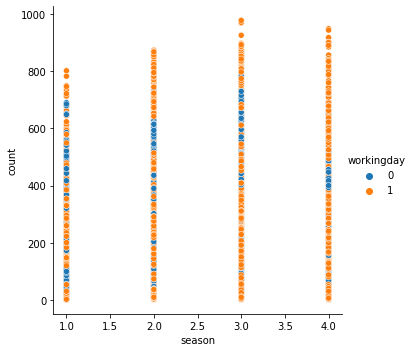

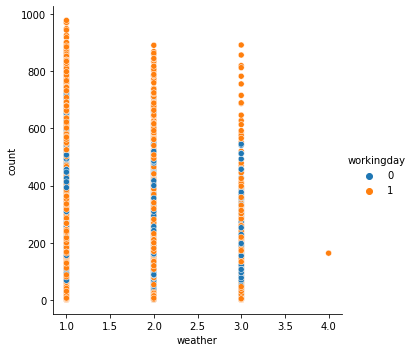

In [6]:
sns.relplot(x='season',y='count',data=train,hue='workingday') 
sns.relplot(x='weather',y='count',data=train,hue='workingday')

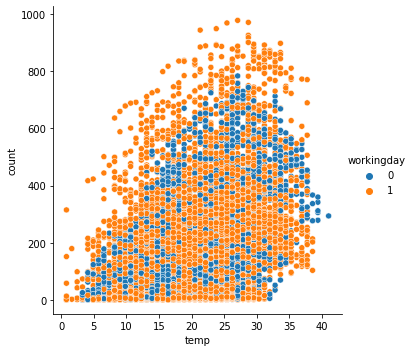

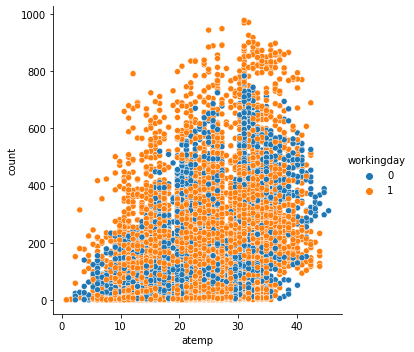

In [7]:
sns.relplot(x='temp',y='count',data=train,hue='workingday')
sns.relplot(x='atemp',y='count',data=train,hue='workingday')

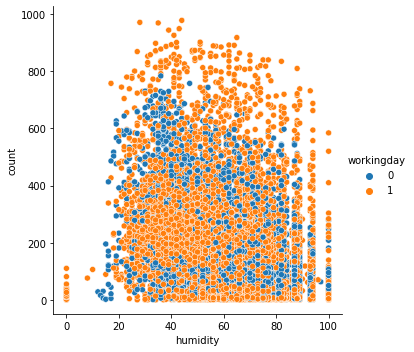

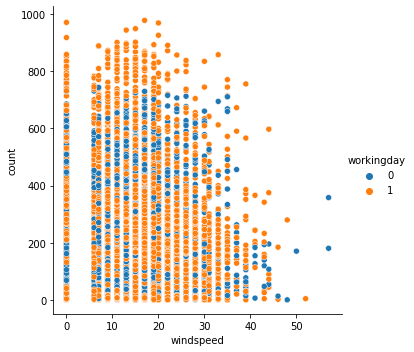

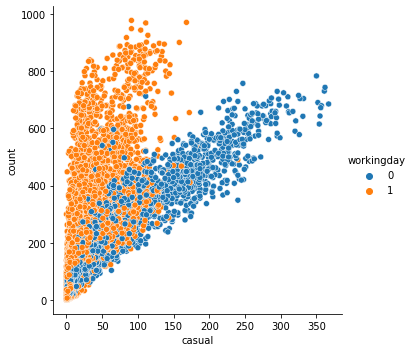

In [8]:
sns.relplot(x='humidity',y='count',data=train,hue='workingday')
sns.relplot(x='windspeed',y='count',data=train,hue='workingday')
sns.relplot(x='casual',y='count',data=train,hue='workingday')

<AxesSubplot:>

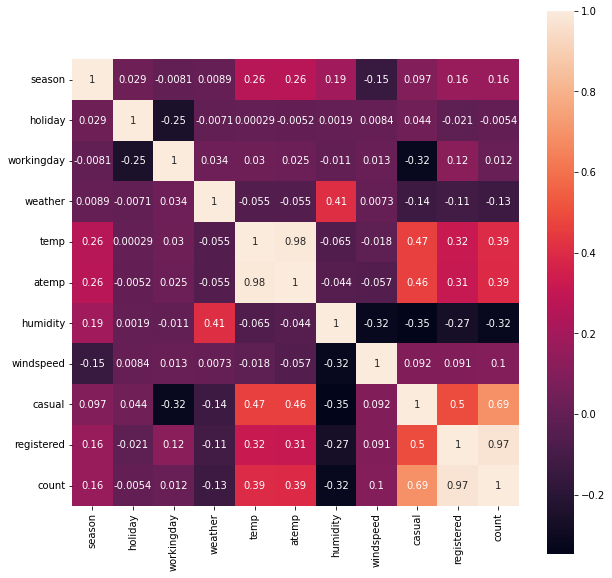

In [9]:
# Correlation matrix

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=train.corr(), square=True, annot=True, cbar=True, ax=ax)

/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/stevenmacauda/.pyenv/versions/3.8.12/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

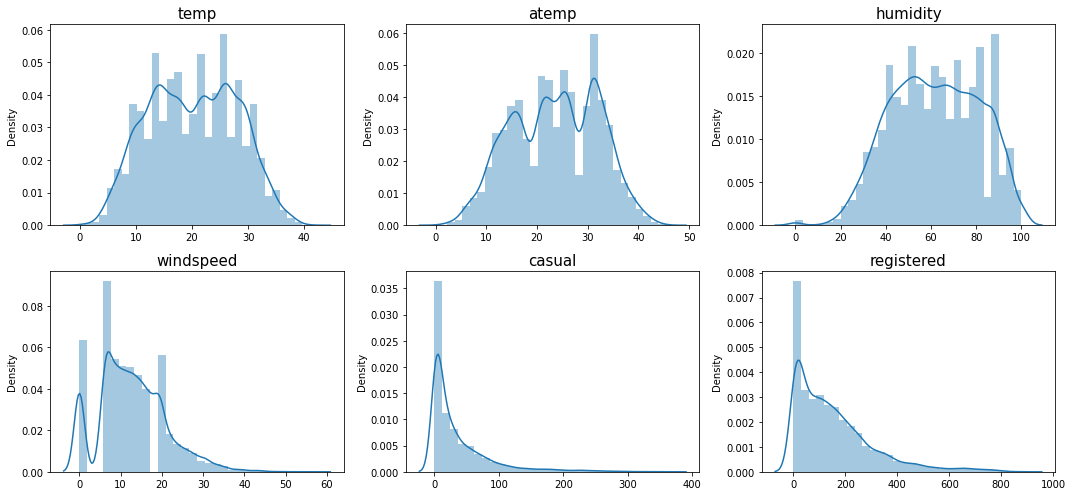

In [10]:
cols = ['temp','atemp','humidity','windspeed','casual','registered']
fig, axes = plt.subplots(2,3,figsize = (10,5))

count=0
for i in range(2):
    for j in range(3):
        x = cols[count+j]
        sns.distplot(train[x].values, ax = axes[i][j],bins = 30)
        axes[i][j].set_title(x,fontsize=15)
        fig.set_size_inches(15,7)
        plt.tight_layout()
    count = count+j+1 

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [13]:
print("Shape of training dataset is: ",train.shape)
print("Does the traing dataset have null values ? -",train.isnull().values.any())

Shape of training dataset is:  (10886, 12)
Does the traing dataset have null values ? - False


In [14]:
visual_df = train.copy()

In [15]:
train['datetime'] = pd.to_datetime(train['datetime'] )#changing the dtype of datetime field to datetime
train['year']=train.datetime.dt.year
train['month']=train.datetime.dt.month
train['day']=train.datetime.dt.day
train['hour']=train.datetime.dt.hour
train['minute']=train.datetime.dt.minute

In [16]:
visual_df['datetime'] = pd.to_datetime(visual_df['datetime'] )#changing the dtype of datetime field to datetime

<AxesSubplot:title={'center':'Hourly trend: There must be high demand during office timings. Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.'}, xlabel='hour'>

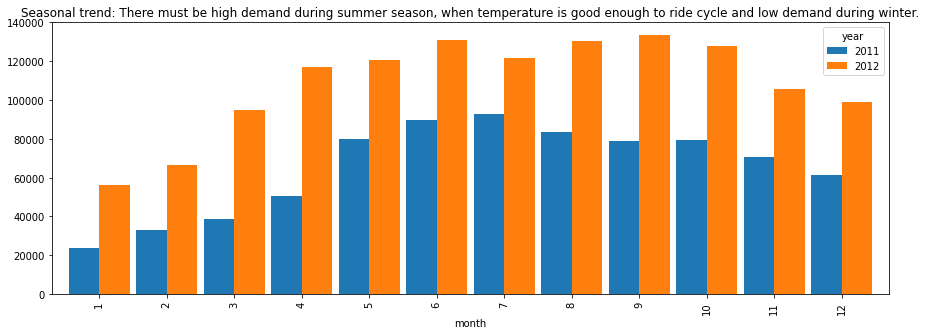

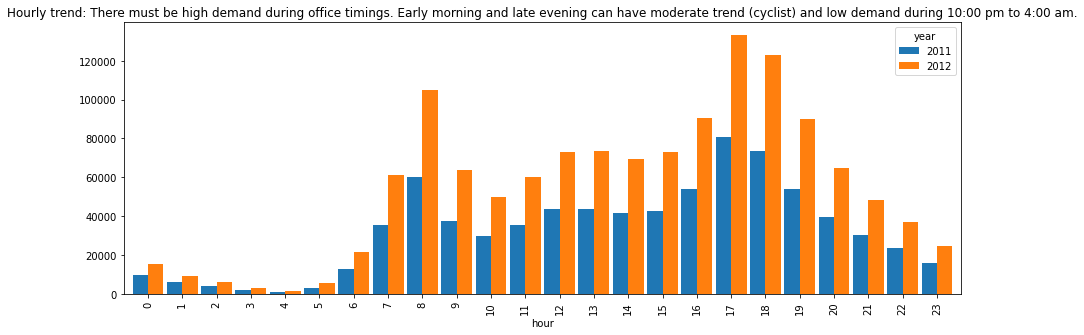

In [17]:
# method for creating the count plot based on hour for a given year 
def plot_by_month(data,aggre,title):
    d2 = data
    d2['year'] = d2.datetime.dt.year
    d2['month'] = d2.datetime.dt.month
    d2['hour'] = d2.datetime.dt.hour
    
    by_year = d2.groupby([aggre,'year'])['count'].sum().unstack() # groupby hour and working day
    
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by hour

plot_by_month(visual_df,'month', "Seasonal trend: There must be high demand during summer season, when temperature is good enough to ride cycle and low demand during winter.")  
plot_by_month(visual_df,'hour', "Hourly trend: There must be high demand during office timings. Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.") 

<AxesSubplot:title={'center':'Hourly pattern based on working days. High trend during hours when peope start to office and leave to home.Year = 2012'}, xlabel='hour'>

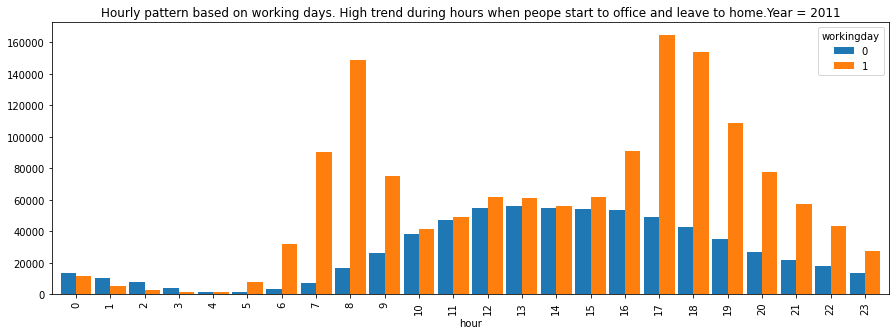

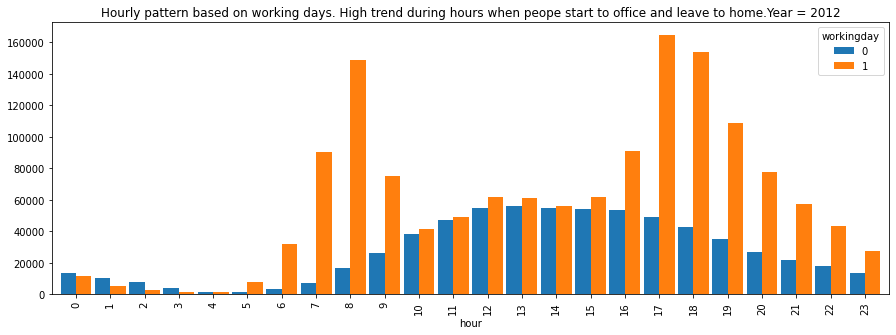

In [18]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year):
    d1 = data
    d1['hour'] = d1.datetime.dt.hour
    
    by_hour = d1.groupby(['hour', 'workingday'])['count'].sum().unstack() # groupby hour and working day
    
    return by_hour.plot(kind='bar', figsize=(15,5), width=0.9, title="Hourly pattern based on working days. High trend during hours when peope start to office and leave to home.Year = {0}".format(year)) # returning the figure grouped by hour


plot_by_hour(visual_df, year=2011) # plotting the count plot based on hour for 2011 
plot_by_hour(visual_df, year=2012) # plotting the count plot based on hour for 2012

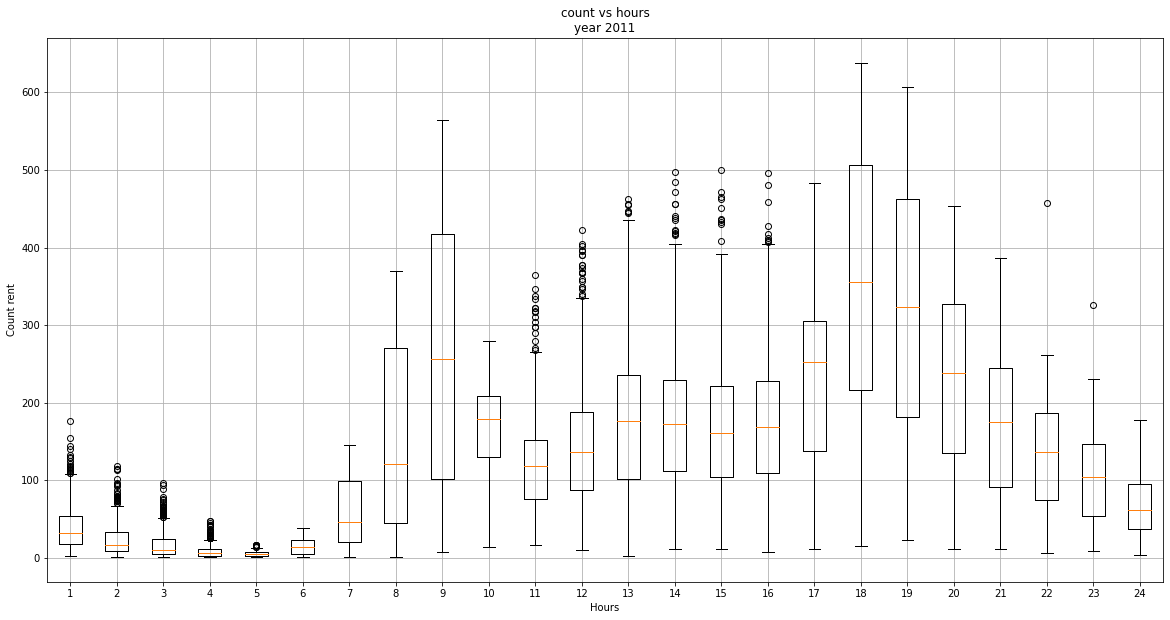

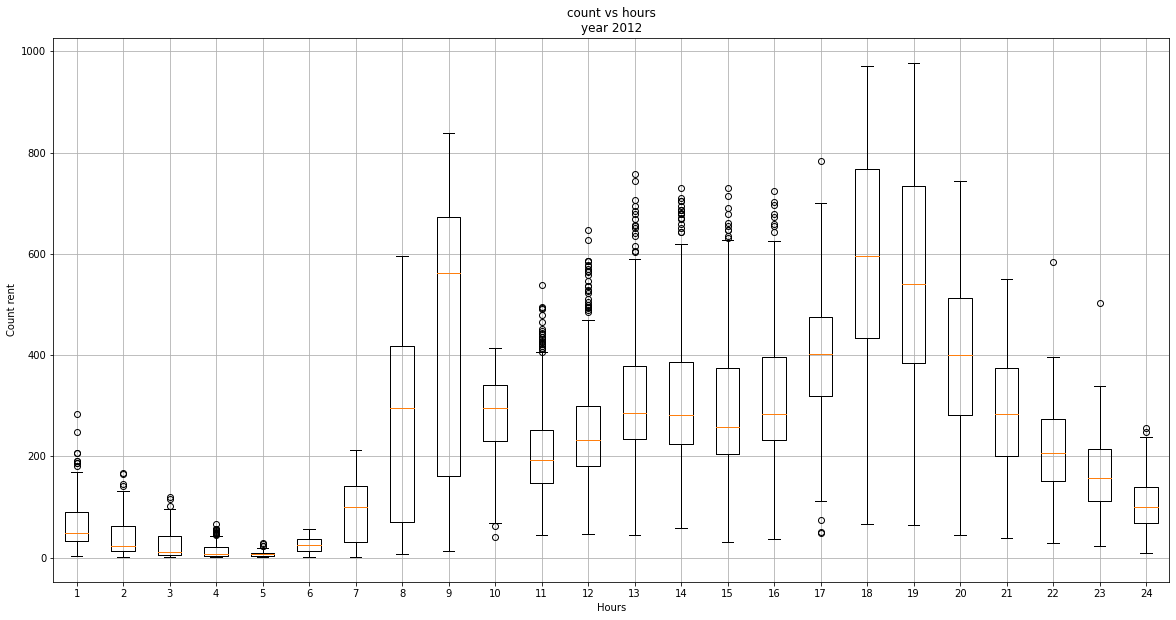

In [19]:
def plot_hours(data, message):
    d2 = data.copy()
    d2['hour'] = data.datetime.dt.hour # extratcing the hour
    
    hours = {}

    for hour in range(24):
        hours[hour] = d2[ d2.hour == hour ]['count'].values

    
    plt.figure(figsize=(20,10))
    plt.ylabel("Count rent")
    plt.xlabel("Hours")
    plt.title("count vs hours\n" + message)
    plt.boxplot( [hours[hour] for hour in range(24)] )
    plt.grid()
    

plot_hours( visual_df[visual_df.datetime.dt.year == 2011], 'year 2011') # box plot for hourly count for the mentioned year
plot_hours( visual_df[visual_df.datetime.dt.year == 2012], 'year 2012') # box plot for hourly count for the mentioned year
 

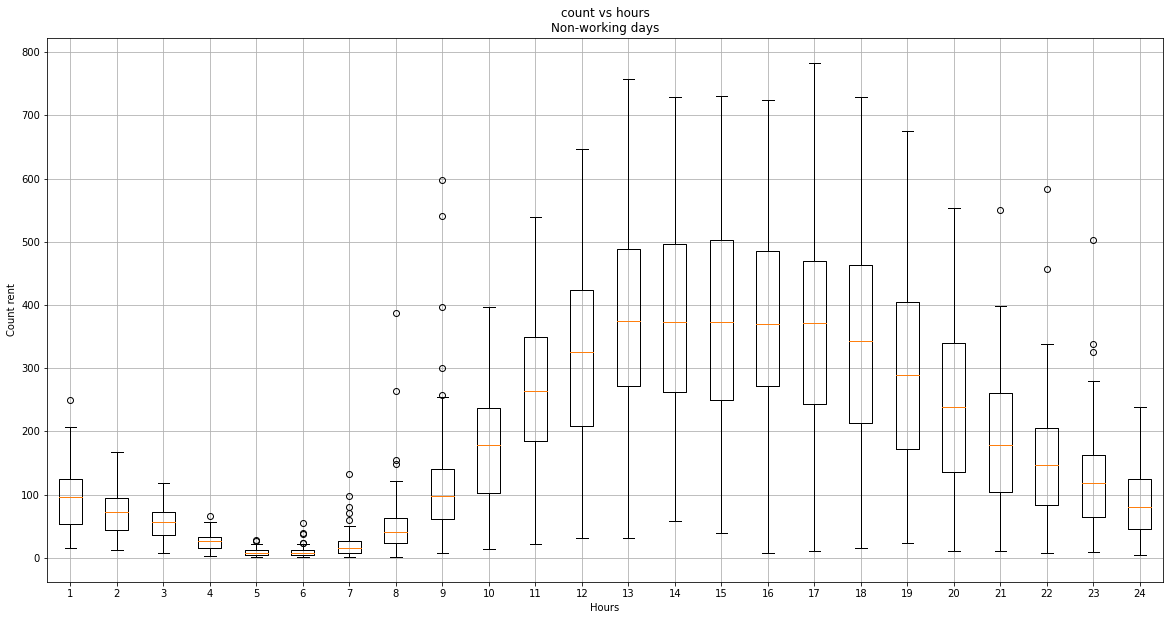

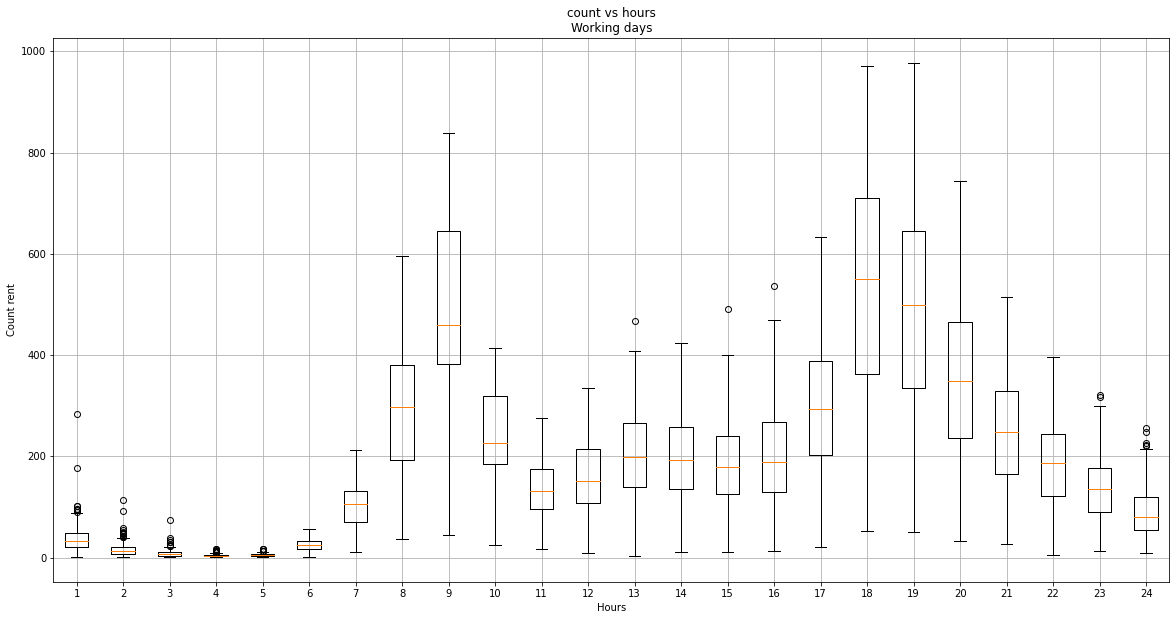

In [20]:
plot_hours( visual_df[visual_df.workingday == 0], 'Non-working days') # box plot for hourly count for the mentioned year
plot_hours( visual_df[visual_df.workingday == 1], 'Working days') # box plot for hourly count for the mentioned year

In [21]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute'],
      dtype='object')

In [22]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score,GridSearchCV,train_test_split

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [24]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0


In [25]:
train['count'] = np.log(train['count']+1)

In [26]:
y_train = train['count'] ## Capture the dependent feature
x_train = train.drop(['datetime','count'],axis=1) ## Capture the independent feature

In [27]:
x_train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,year,month,day,hour,minute
0,1,0,0,1,9.84,14.395,81,0.0,3,13,2011,1,1,0,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,2011,1,1,1,0
2,1,0,0,1,9.02,13.635,80,0.0,5,27,2011,1,1,2,0
3,1,0,0,1,9.84,14.395,75,0.0,3,10,2011,1,1,3,0
4,1,0,0,1,9.84,14.395,75,0.0,0,1,2011,1,1,4,0


In [28]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [29]:
x_train1 = x_train.drop(['casual','registered'],axis=1) # Removing casual and registered as its not available in test data

In [30]:
x_train_pred,x_test_pred,y_train_pred,y_test_pred = train_test_split(x_train1,y_train, test_size=0.3, random_state=42)

In [31]:
x_train_pred.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute
613,1,0,1,1,9.02,9.09,32,39.0007,2011,2,8,17,0
4030,3,0,0,1,22.14,25.76,68,12.9980,2011,9,18,23,0


In [32]:
models=[RandomForestRegressor(),Lasso(alpha=0.01),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','Lasso','DecisionTreeRegressor','SVR','KNeighborsRegressor']
rmse=[]
r_squared=[]
mae=[]
dic={}
for model in range (len(models)):
    alg=models[model]
    alg.fit(x_train_pred,y_train_pred)
    alg_y_pred=alg.predict(x_test_pred)
    rmse.append(np.sqrt(mean_squared_error(y_test_pred,alg_y_pred)))
    mae.append(mean_absolute_error(y_test_pred,alg_y_pred))
    r_squared.append(r2_score(y_test_pred,alg_y_pred))
dic={'Modelling Algorithms':model_names,'RMSE':rmse,'R-Squared':r_squared, 'Mean Absolute Error': mae}   
model_performances= pd.DataFrame(dic)

model_performances

,Modelling Algorithms,RMSE,R-Squared,Mean Absolute Error
0,RandomForestRegressor,0.326789,0.946330,0.220890
1,Lasso,1.021079,0.476024,0.807870
2,DecisionTreeRegressor,0.454675,0.896105,0.303595
3,SVR,1.299214,0.151690,0.958028
4,KNeighborsRegressor,0.861715,0.626818,0.625658


Text(0.5, 1.0, 'Algorithms vs RMSE')

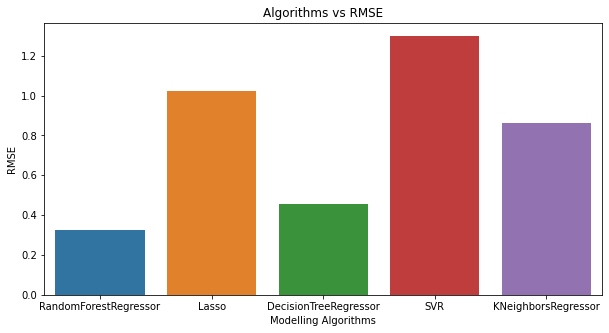

In [33]:
plt.figure(figsize = (10,5))
sns.barplot(x='Modelling Algorithms',y='RMSE',data=model_performances)
plt.title("Algorithms vs RMSE")

Text(0.5, 1.0, 'Algorithms vs R-Squared')

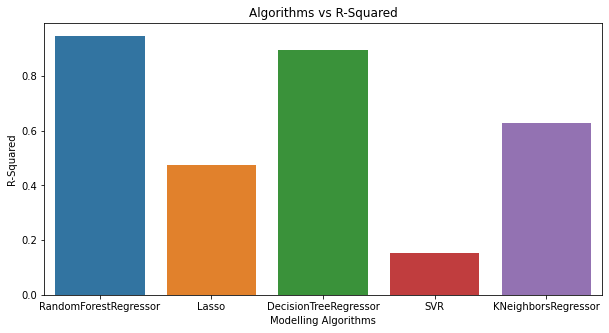

In [34]:
plt.figure(figsize = (10,5))
sns.barplot(x='Modelling Algorithms',y='R-Squared',data=model_performances)
plt.title("Algorithms vs R-Squared")

In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# Minimum number of samples required to split a node
min_samples_split = [5, 10]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split}

In [36]:
random_grid

{'n_estimators': [20, 65, 110, 155, 200],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [1, 23, 45],
 'min_samples_split': [5, 10]}

In [37]:
rF_random = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# Fit the random search model
rF_random.fit(x_train_pred,y_train_pred)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [1, 23, 45],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [20, 65, 110, 155,
                                                         200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [38]:
rF_random.best_params_

{'n_estimators': 155,
 'min_samples_split': 10,
 'max_features': 'auto',
 'max_depth': 45}

In [39]:
# Performance Comparison
best_fit= rF_random.best_estimator_.predict(x_test_pred)
print("Performance after hyperparameter tuning :\n")
print("Modelling algorithm: RandomForestRegressor ")
print("RMSE value is: ",np.sqrt(mean_squared_error(y_test_pred,best_fit)))
print("R-Squared value is ",r2_score(y_test_pred,best_fit))
print("Mean absolute error value is ",mean_absolute_error(y_test_pred,best_fit))

Performance after hyperparameter tuning :

Modelling algorithm: RandomForestRegressor 
RMSE value is:  0.32668018716019437
R-Squared value is  0.9463661863948469
Mean absolute error value is  0.22214819428079885


In [40]:
test.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [41]:
test['datetime'] = pd.to_datetime(test['datetime'])
test['year']=test.datetime.dt.year
test['month']=test.datetime.dt.month
test['day']=test.datetime.dt.day
test['hour']=test.datetime.dt.hour
test['minute']=test.datetime.dt.minute

In [42]:
test_val = test.drop(['datetime'],axis=1)

In [43]:
test_val.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute
0,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0


In [44]:
predictions = rF_random.best_estimator_.predict(test_val)

In [45]:
predictions_exp = np.exp(predictions)-1

In [46]:
predictions_exp

array([ 12.29076293,   4.75874839,   3.94229808, ..., 124.18820856,
       106.67360076,  73.08610507])

In [47]:
submission = pd.DataFrame({'datetime':test['datetime'],'count': predictions_exp})

In [48]:
submission.head()


,datetime,count
0,2011-01-20 00:00:00,12.290763
1,2011-01-20 01:00:00,4.758748
2,2011-01-20 02:00:00,3.942298
3,2011-01-20 03:00:00,3.048186
4,2011-01-20 04:00:00,2.539818


In [49]:
submission_viz=submission.copy()

In [50]:
submission_viz['datetime'] = pd.to_datetime(submission_viz['datetime'])

<AxesSubplot:title={'center':'Testing Data - Hourly trend: There must be high demand during office timings.\n Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.'}, xlabel='hour'>

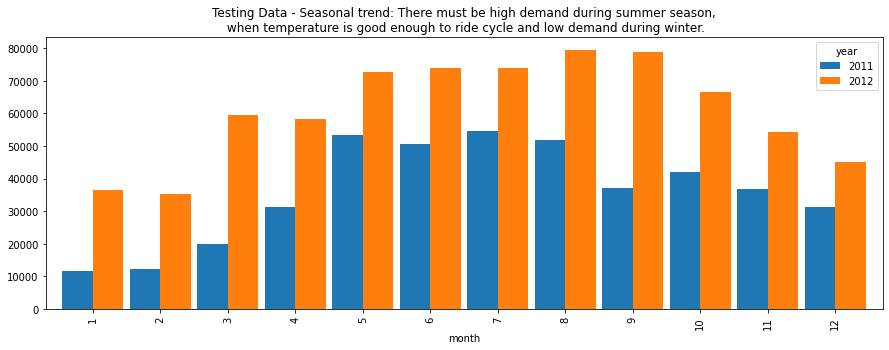

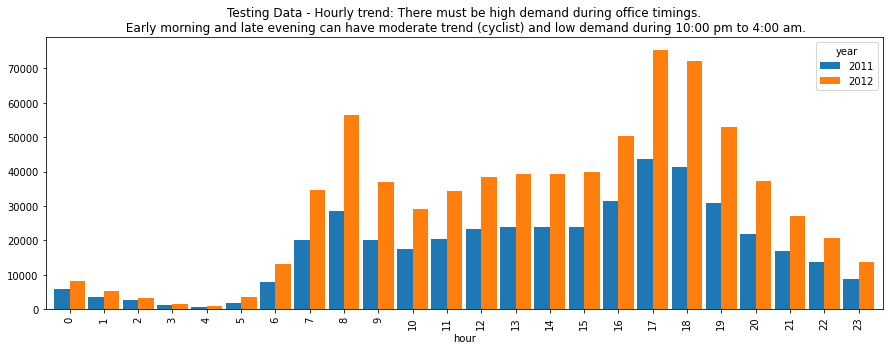

[CV] END max_depth=1, max_features=auto, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] END max_depth=45, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.6s
[CV] END max_depth=45, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.5s
[CV] END max_depth=1, max_features=sqrt, min_samples_split=5, n_estimators=155; total time=   0.5s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=5, n_estimators=200; total time=   2.1s
[CV] END max_depth=45, max_features=auto, min_samples_split=10, n_estimators=155; total time=   3.8s
[CV] END max_depth=45, max_features=sqrt, min_samples_split=10, n_estimators=110; total time=   1.0s
[CV] END max_depth=1, max_features=auto, min_samples_split=5, n_estimators=20; total time=   0.1s
[CV] END max_depth=1, max_features=auto, min_samples_split=10, n_estimators=20; total time=   0.1s
[CV] 

In [51]:
def plot_by_month_pred(data,aggre,title):
    d2 = data
    d2['year'] = d2.datetime.dt.year
    d2['month'] = d2.datetime.dt.month
    d2['hour'] = d2.datetime.dt.hour
    
    by_year = d2.groupby([aggre,'year'])['count'].sum().unstack() # groupby hour and working day
    
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title) # returning the figure grouped by hour


plot_by_month_pred(submission_viz,'month', "Testing Data - Seasonal trend: There must be high demand during summer season,\n when temperature is good enough to ride cycle and low demand during winter.")  
plot_by_month_pred(submission_viz,'hour', "Testing Data - Hourly trend: There must be high demand during office timings.\n Early morning and late evening can have moderate trend (cyclist) and low demand during 10:00 pm to 4:00 am.") 